Q1: What are the common transformation techniques applicable to turn a non-stationary
series into a stationary series?

Common methods are:
1. Differencing: 1st order differencing where y(t) is subtracted from y(t-1)
2. Decomposition: Decomposing a time series into its trend, seasonal and cyclical patterns
    a. Additive Decomposition
    b. Multiplicative Decomposition
    c. STL: “Seasonal and Trend decomposition using Loess”
3. Logarithmic Transformation: 
4. Box-Cox transformation: Used to stabilise non-uniform inconsistent variance

Q2: What is the Box-Cox transform? Give its definition and explain its generality

The Box-Cox transformation is a mathematical transformation used to stabilize the variance of a dataset and make it approximately normal or Gaussian distributed.

# ADD FORMULA HERE

y is the original data.
λ is the transformation parameter. It can take any real value, including zero.
𝑦(𝜆) is the transformed data.

The parameter 𝜆. λ is typically selected to maximize the log-likelihood of the transformed data. This can be done by trying different values of 𝜆
 and selecting the one that results in the most approximately normal distribution of the transformed data.

 It's important to note that the Box-Cox transformation is applicable only to strictly positive data. If your data contains zero or negative values, you may need to shift the data or use alternative transformations, such as the Yeo-Johnson transformation, which extends the Box-Cox transformation to handle non-positive data

Q3: Can a differencing operation remove a linear trend? Give an example by generating a
synthetic series, and draws the series before differencing and after differencing.

Yes. Lag-1 differencing was used in task5 to make the time series stationary

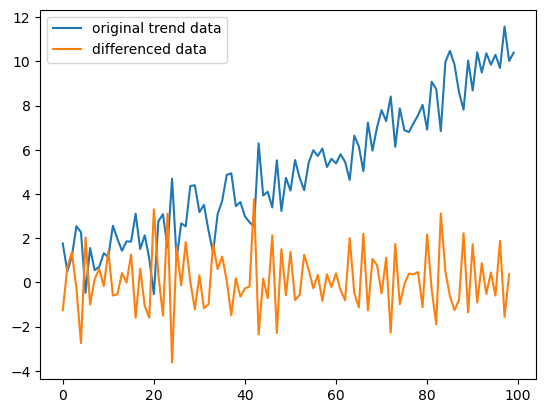

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plot_filename_base = 6

# Generate synthetic time series with a linear trend
np.random.seed(0)  # for reproducibility
n = 100
linear_trend = np.linspace(0, 10, n)  # linear trend component
noise = np.random.normal(0, 1, n)  # random noise
series = linear_trend + noise

# Apply differencing to remove the linear trend
differenced_series = np.diff(series)

# Plot
# Line plot
plt.figure()
plt.plot(series, label="original trend data")
plt.plot(differenced_series, label="differenced data")
plt.legend()
plt.savefig(f'plots/{plot_filename_base}_differenced_line.png')


Q4: Can a differencing operation remove an exponential trend? If not, which additional
transformation needs to be taken? Give an example by generating a synthetic series,
and plots the series before transformation and after transformation, before differencing
and after differencing

Differencing cannot remove an exponential trend. However, a logarithmic transformation followed by differencing may work.

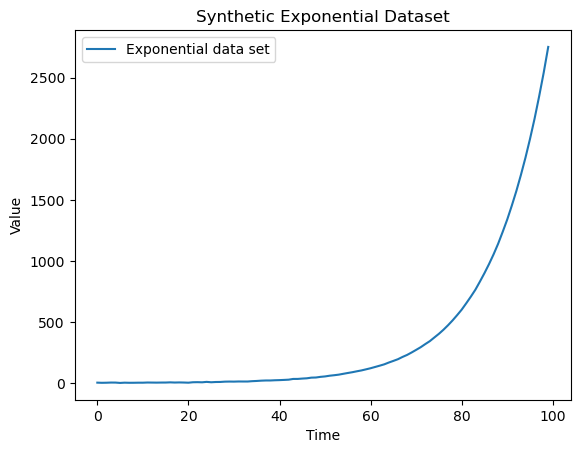

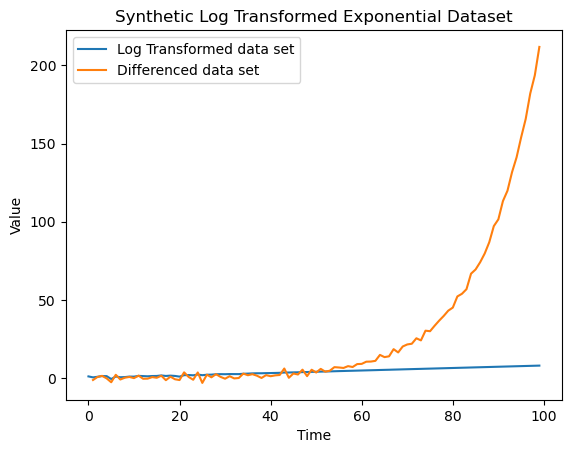

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Number of data points
n = 100

# Generate time points
time_points = np.arange(n)

# Generate exponential data
exponential_data = np.exp(0.08 * time_points) + noise

# Perform logarithmic transformation
log_transformed_data = np.log(exponential_data)

# Perform differencing
differenced_data = np.diff(exponential_data)

plt.figure()
plt.plot(time_points, exponential_data, label='Exponential data set')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Exponential Dataset')
plt.legend()
plt.savefig(f'plots/{plot_filename_base}_exponential_line.png')

plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Log Transformed Exponential Dataset')
plt.plot(time_points, log_transformed_data, label='Log Transformed data set')
plt.plot(time_points[1:], differenced_data, label='Differenced data set')
plt.legend()
plt.savefig(f'plots/{plot_filename_base}_exponential_transform_line.png')

Q5: Can a differencing operation remove a seasonal (periodic) trend? If yes, under what
condition? Give an example by generating a synthetic series, draw its ACF, and draws
the series before differencing and after differencing with different step length.

Yes, possibly. If the seasonal effect is periodic, we can difference with a lag uequivalent to that periodicity.

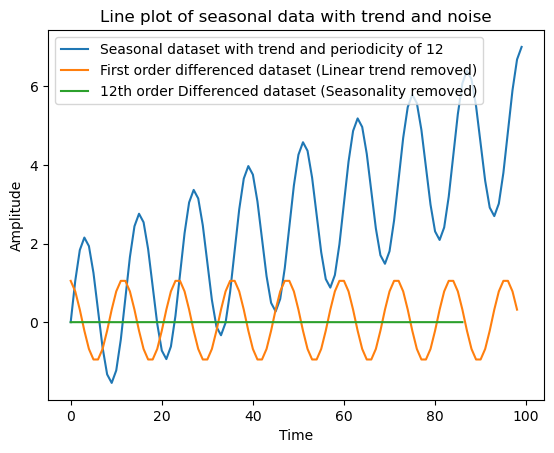

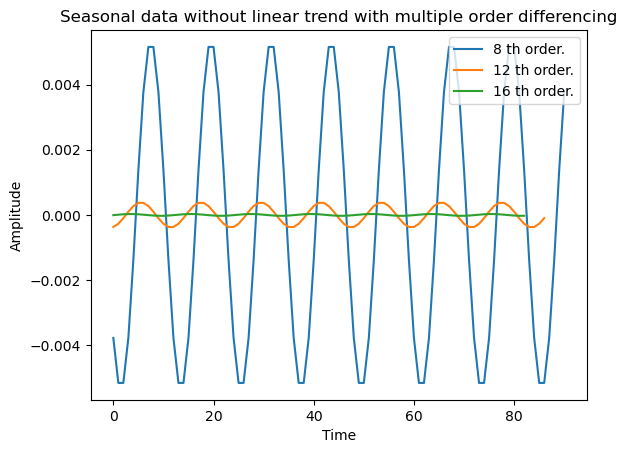

<Figure size 640x480 with 0 Axes>

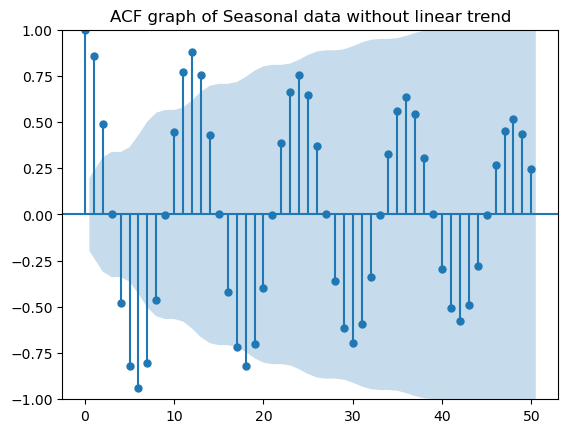

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

# Generate data set with seasonal trend of 12 with an additional upward trend and noise
linear_trend = np.linspace(0, 5, n)  # linear trend component
seasonal_trend = linear_trend + 2*np.sin(2 * np.pi * time_points / 12)

#Line plot
plt.figure()
plt.plot(seasonal_trend, label="Seasonal dataset with trend and periodicity of 12")
plt.title("Line plot of seasonal data with trend and noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#Difference lag-1 (Removes linear trend)
differenced_data = np.diff(seasonal_trend, n=1)
plt.plot(differenced_data, label="First order differenced dataset (Linear trend removed)")

differenced_data2 = np.diff(differenced_data, n=12)

#Line plot of differenced data
plt.plot(differenced_data2, label="12th order Differenced dataset (Seasonality removed)")
plt.legend()
plt.savefig(f'plots/{plot_filename_base}_Differenced_Seasonal_Dataset.png')

#Line plot of seasonal data differenced for multiple orders
plt.figure()
for i in range(4,17,4):
    differenced_data_temp = np.diff(differenced_data, n=i)
    plt.plot(differenced_data_temp, label= str(i) + " th order.")
plt.legend()
plt.title("Seasonal data without linear trend with multiple order differencing")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig(f'plots/{plot_filename_base}_Differenced_Multiple_N.png')
plt.show()

#plot acf
plt.figure()
plot_acf(differenced_data, lags=50)
plt.title("ACF graph of Seasonal data without linear trend")
plt.savefig(f'plots/{plot_filename_base}_ACF_Seasonal_Dataset.png')